<a href="https://colab.research.google.com/github/shivam9421/machine-learning/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NEW  PROJECT

#Importing dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Data Loading

In [ ]:
file_path="/content/drive/MyDrive/Colab Notebooks/train.csv"

In [ ]:
df=pd.read_csv(file_path)

#Data processing

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- check the number of missing values  in the data

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0




#Handling the missing values

In [ ]:
df=df.drop(columns='Cabin',axis=1 )

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Replacing the missing value of age with mean values

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
mean_age=df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C



**checking   how many people are boarded from which place**

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


**fill the missing data  mode value to the Embarked column**

In [ ]:
df['Embarked'].fillna('S',inplace=True)

/tmp/ipython-input-229-3895404187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#Data Analysis

In [ ]:
#getting some  statstical measure about data
#how many people are survived
checking_howmanypeople_survived=df['Survived'].value_counts().rename({0:'Dead',1:'Survived'})
print(checking_howmanypeople_survived)

Survived
Dead        549
Survived    342
Name: count, dtype: int64


Text(0, 0.5, '')

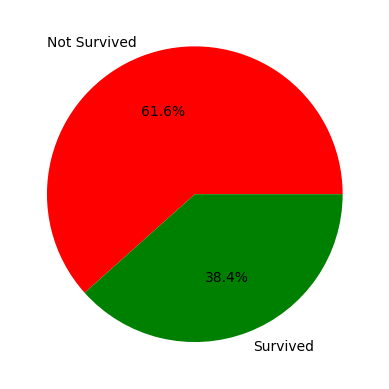

In [ ]:
#plot how many people are survived or not by pie chart
checking_howmanypeople_survived.plot(kind='pie',autopct='%1.1f%%', labels=['Not Survived', 'Survived'],colors=['red','green'])
plt.ylabel("")

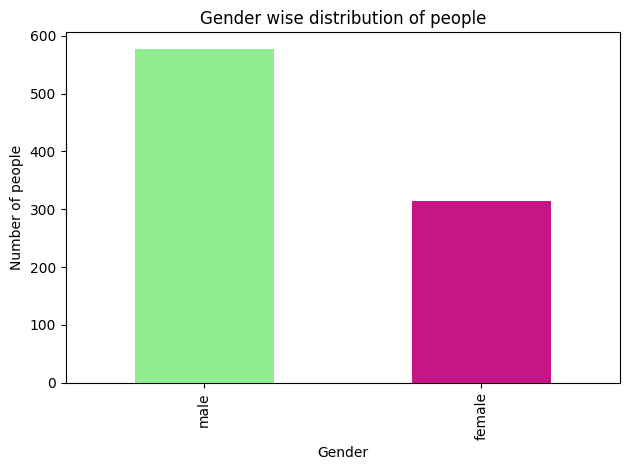

In [ ]:
#how many and female are in the ship
df['Sex'].value_counts().plot(kind='bar',color=['lightgreen','mediumvioletred'])
plt.ylabel('Number of people')
plt.xlabel('Gender')
plt.title('Gender wise distribution of people')
plt.tight_layout()

In [ ]:
#number of people died based on gender
df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

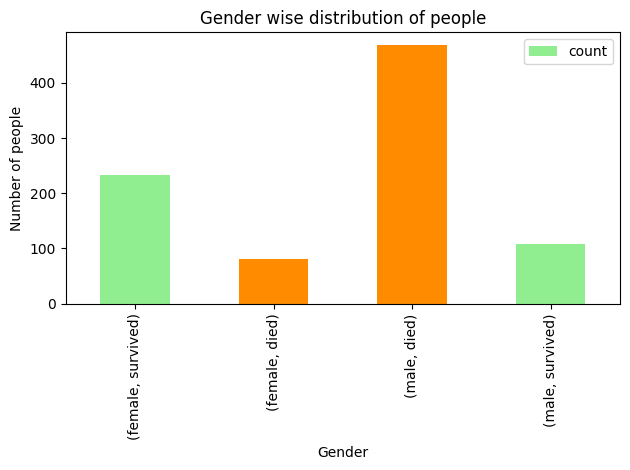

In [ ]:
df.groupby(['Sex'])['Survived'].value_counts().rename({0:'died',1:'survived'}).plot(kind='bar',color=['lightgreen','darkorange','darkorange','lightgreen'])
plt.ylabel('Number of people')
plt.legend()
plt.xlabel('Gender')
plt.title('Gender wise distribution of people')
plt.tight_layout()

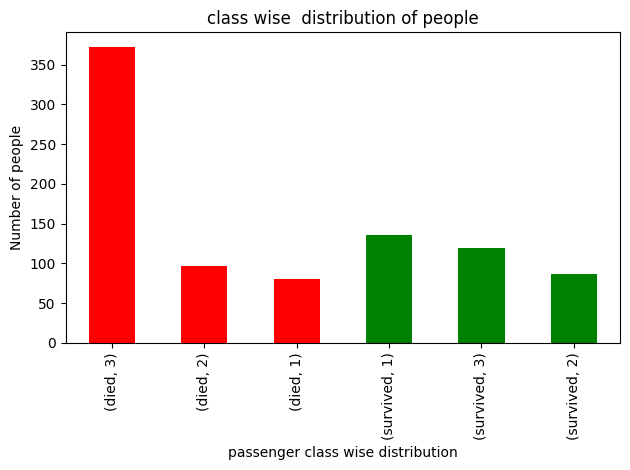

In [ ]:
df["Survived"] = df["Survived"].map({0: "died", 1: "survived"})

df.groupby(['Survived'])['Pclass'].value_counts().plot(kind='bar',color=['red','red','red','green','green','green'])
plt.ylabel('Number of people')
# plt.legend()
plt.xlabel('passenger class wise distribution')
plt.title('class wise  distribution of people')
plt.tight_layout()

In [ ]:
df.groupby(['Survived'])['Pclass'].value_counts()

Survived  Pclass
died      3         372
          2          97
          1          80
survived  1         136
          3         119
          2          87
Name: count, dtype: int64

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#encoding the categorical columns

In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [ ]:
#converting categorical columns
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

/tmp/ipython-input-241-3236185947.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,died,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,survived,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,died,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Seprating the features and target

In [ ]:
X = df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived'].map({ "died":0,  "survived":1})


In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# splitting the data into training data & test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.5, random_state=2)

In [ ]:
print(X.shape, x_train.shape, x_test.shape)

(891, 7) (445, 7) (446, 7)


#Model training
##Logistic regression

In [ ]:
model=LogisticRegression()

In [ ]:
#training the logistic regression model with training data
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##Model evaluation

Accuracy score

In [ ]:
x_train_prediction=model.predict(x_train)


In [ ]:
print(x_train_prediction)

[1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0]


In [ ]:
trainigg_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [ ]:
print('accuracy score of training data:',trainigg_data_accuracy)

accuracy score of training data: 0.8


In [ ]:
x_test_pediction=model.predict(x_test)

In [ ]:
print(x_test_pediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0]


In [ ]:
test_data_accuracy=accuracy_score(y_test,x_test_pediction)

In [ ]:
print('accuracy score of test data:',test_data_accuracy)

accuracy score of test data: 0.8161434977578476



##  Conclusion:
- Logistic Regression achieved 81.61% accuracy.
- Women had higher survival rate.
- Pclass 3 passengers had lower survival chances.
